In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Подготовка

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/driv


## Импорт данных

In [9]:
df_main = pd.read_csv('driv/MyDrive/MVD/lab3/API_19_DS2_en_csv_v2_5361599.csv', sep=',', skiprows=4)
df_main = df_main.iloc[:, :-1]

id_columns = ['Country Name',
              'Country Code',
              'Indicator Name',
              'Indicator Code']
df_main = pd.melt(df_main, id_vars=id_columns,
                  var_name='Year',
                  value_name='Value')
df_main['Year'] = pd.to_numeric(df_main['Year'])
df_main

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1960,50.776
1,Aruba,ABW,Urban population,SP.URB.TOTL,1960,27728.000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,1960,NaN
3,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54608.000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,1960,NaN
...,...,...,...,...,...,...
1253387,Zimbabwe,ZWE,Rural land area where elevation is below 5 met...,AG.LND.EL5M.RU.ZS,2021,NaN
1253388,Zimbabwe,ZWE,Rural land area where elevation is below 5 met...,AG.LND.EL5M.RU.K2,2021,NaN
1253389,Zimbabwe,ZWE,Arable land (% of land area),AG.LND.ARBL.ZS,2021,NaN
1253390,Zimbabwe,ZWE,Agricultural land (% of land area),AG.LND.AGRI.ZS,2021,NaN


In [10]:
meta_country_df = pd.read_csv('driv/MyDrive/MVD/lab3/Metadata_Country_API_19_DS2_en_csv_v2_5361599.csv')
meta_country_df = meta_country_df.iloc[:, :-1]

In [11]:
meta_indicators_df = pd.read_csv('driv/MyDrive/MVD/lab3/Metadata_Indicator_API_19_DS2_en_csv_v2_5361599.csv')
meta_indicators_df.columns = meta_indicators_df.columns.str.lower()
meta_indicators_df.sort_values(['indicator_code'], inplace=True)
meta_indicators_df = meta_indicators_df.reset_index(drop=True)
meta_indicators_df = meta_indicators_df.iloc[:, :-1]

## Что за данные? Анализ метаданных

### country

In [12]:
meta_country_df

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola
...,...,...,...,...,...
260,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo
261,YEM,Middle East & North Africa,Low income,The World Bank systematically assesses the app...,"Yemen, Rep."
262,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa
263,ZMB,Sub-Saharan Africa,Low income,National accounts data were rebased to reflect...,Zambia


Заметим, что здесь имеются не только страны, но и агрегации стран
По территориальному признаку:
* Africa Eastern and Southern
* Africa Western and Central
* World


У таких показателей стоят Nan в IncomeGroup

In [13]:
income_nan_mask = meta_country_df['IncomeGroup'].isna()
meta_country_df[income_nan_mask]

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central
7,ARB,NaN,NaN,Arab World aggregate. Arab World is composed o...,Arab World
36,CEB,NaN,NaN,Central Europe and the Baltics aggregate.,Central Europe and the Baltics
49,CSS,NaN,NaN,NaN,Caribbean small states
61,EAP,NaN,NaN,NaN,East Asia & Pacific (excluding high income)
62,EAR,NaN,NaN,Early-dividend countries are mostly lower-midd...,Early-demographic dividend
63,EAS,NaN,NaN,East Asia and Pacific regional aggregate (incl...,East Asia & Pacific
64,ECA,NaN,NaN,NaN,Europe & Central Asia (excluding high income)
65,ECS,NaN,NaN,Europe and Central Asia regional aggregate (in...,Europe & Central Asia


In [14]:
region_nan_mask = meta_country_df['Region'].isna()
meta_country_df[region_nan_mask]

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central
7,ARB,NaN,NaN,Arab World aggregate. Arab World is composed o...,Arab World
36,CEB,NaN,NaN,Central Europe and the Baltics aggregate.,Central Europe and the Baltics
49,CSS,NaN,NaN,NaN,Caribbean small states
61,EAP,NaN,NaN,NaN,East Asia & Pacific (excluding high income)
62,EAR,NaN,NaN,Early-dividend countries are mostly lower-midd...,Early-demographic dividend
63,EAS,NaN,NaN,East Asia and Pacific regional aggregate (incl...,East Asia & Pacific
64,ECA,NaN,NaN,NaN,Europe & Central Asia (excluding high income)
65,ECS,NaN,NaN,Europe and Central Asia regional aggregate (in...,Europe & Central Asia


In [15]:
a = region_nan_mask
b = income_nan_mask
both_nan = (a | b) & ~(a & b)
meta_country_df[both_nan]

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
253,VEN,Latin America & Caribbean,NaN,NaN,"Venezuela, RB"


Единственная "страна", у которой толькок один Nan - это Venezuela. У нее нет IncomeGroup, но есть регион.

Вывод: если region - nan, то это не страна, агрегация

In [16]:
# Запишем Названия в таблице для стран, которые на самом деле не являются агрегациями
aggregate_cols = meta_country_df.loc[region_nan_mask, 'TableName']
aggregate_cols

1                            Africa Eastern and Southern
3                             Africa Western and Central
7                                             Arab World
36                        Central Europe and the Baltics
49                                Caribbean small states
61           East Asia & Pacific (excluding high income)
62                            Early-demographic dividend
63                                   East Asia & Pacific
64         Europe & Central Asia (excluding high income)
65                                 Europe & Central Asia
68                                             Euro area
73                                        European Union
74              Fragile and conflict affected situations
95                                           High income
98                Heavily indebted poor countries (HIPC)
102                                            IBRD only
103                                     IDA & IBRD total
104                            

In [17]:
union_aggregate = {'Arab World',
               'European Union'
               'IBRD only',
               'IDA & IBRD total',
                'IBRD only',
               'IDA total',
               'IDA blend',
               'IDA only',
               'OECD members'}


poor_aggregate = {
            'Fragile and conflict affected situations',
            'Heavily indebted poor countries (HIPC)',
            'Least developed countries: UN classification'}

income_aggregate = {'Low income',
                    'Lower middle income',
                    'Low & middle income',
                    'Upper middle income',
                    'Middle income',
                    'High income'}

dividend_aggregate = {'Early-demographic dividend',
                      'Late-demographic dividend',
                      'Pre-demographic dividend',
                      'Post-demographic dividend'}

all_without_region = union_aggregate.union(poor_aggregate).union(income_aggregate).union(dividend_aggregate)


region_aggregate = set(aggregate_cols.to_list()).difference(all_without_region)
region_aggregate

{'Africa Eastern and Southern',
 'Africa Western and Central',
 'Caribbean small states',
 'Central Europe and the Baltics',
 'East Asia & Pacific',
 'East Asia & Pacific (IDA & IBRD)',
 'East Asia & Pacific (excluding high income)',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (IDA & IBRD)',
 'Europe & Central Asia (excluding high income)',
 'European Union',
 'Latin America & Caribbean',
 'Latin America & Caribbean (IDA & IBRD)',
 'Latin America & Caribbean (excluding high income)',
 'Middle East & North Africa',
 'Middle East & North Africa (IDA & IBRD)',
 'Middle East & North Africa (excluding high income)',
 'North America',
 'Other small states',
 'Pacific island small states',
 'Small states',
 'South Asia',
 'South Asia (IDA & IBRD)',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD)',
 'Sub-Saharan Africa (excluding high income)',
 'World'}

### indicators

In [18]:
meta_indicators_df

,indicator_code,indicator_name,source_note,source_organization
0,AG.LND.AGRI.K2,Agricultural land (sq. km),Agricultural land refers to the share of land ...,"Food and Agriculture Organization, electronic ..."
1,AG.LND.AGRI.ZS,Agricultural land (% of land area),Agricultural land refers to the share of land ...,"Food and Agriculture Organization, electronic ..."
2,AG.LND.ARBL.ZS,Arable land (% of land area),Arable land includes land defined by the FAO a...,"Food and Agriculture Organization, electronic ..."
3,AG.LND.EL5M.RU.K2,Rural land area where elevation is below 5 met...,Rural land area below 5m is the total rural la...,Center for International Earth Science Informa...
4,AG.LND.EL5M.RU.ZS,Rural land area where elevation is below 5 met...,Rural land area below 5m is the percentage of ...,Center for International Earth Science Informa...
...,...,...,...,...
71,SP.POP.GROW,Population growth (annual %),Annual population growth rate for year t is th...,Derived from total population. Population sour...
72,SP.POP.TOTL,"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...
73,SP.URB.GROW,Urban population growth (annual %),Urban population refers to people living in ur...,World Bank staff estimates based on the United...
74,SP.URB.TOTL,Urban population,Urban population refers to people living in ur...,World Bank staff estimates based on the United...


По indcator_code можно Понять к какой категории относится метрика.
* AG - Agticulture
* BX - Инвестиции в страну
* NV - Влад зеленого бизнеса в экономику
* EG - Энергия
    * ELC - электричество. Сколько подключено. Производство
    * FEC - Потребления возобновляемой энергии
    * USE - использование
* EN - Показатели окружающей среды
    * ATM - загрязнение атмосферы
    * CLS - Катаклизмы
    * POP - Количество людей проживающих в определенных экологических условиях
    * URB - урбанизация
* IC - Ease of doing business
* SE - образование
* SH - медицина, смертность
* SP - статисткиа популяции
    * POP - популяция в целом
    * URB - урбанизация
* SI - бедность

Кластеризуем



Метрики достатка:

* AG - возможности и использование земледелия
* BX - Инвестиции в страну
* NV - Вклад Agriculture, forestry, and fishing в % от ВВП
* IC - Ease of doing business
* SE - образование
* SH - медицина, смертность
* SP - статистка популяции
    * POP - популяция в целом
    * URB - урбанизация

Метрики потребления:
* EG - Энергия
    * ELC - электричество. Сколько подключено. Производство
    * FEC - Потребления возобновляемой энергии
    * USE - использование

Метрики загрязнения:
* EN - Показатели окружающей среды
    * ATM - загрязнение атмосферы
    * CLS - Катаклизмы
    * POP - Количество людей проживающих в определенных экологических условиях
    * URB - урбанизация

### Вывод по метаданным

-Для каждой категории имеется много метрик. Надо определить наиболее полезные из них по семантике и отсутсвию пустых значений

-Отделить агрегированные данные от данных по конкретным странам

## Выбор данных годов, метрик и стран на основании отсутствующих значений и полезности метрик

In [19]:
def metrics_with_code(codes):
    mask = meta_indicators_df.str.contains(codes[0])
    for code in codes[1:]:
        mask |= meta_indicators_df.str.contains(code)
    return meta_country_df.loc[mask, 'indicator_code']

### Выбор года

Text(0, 0.5, 'Количество nan')

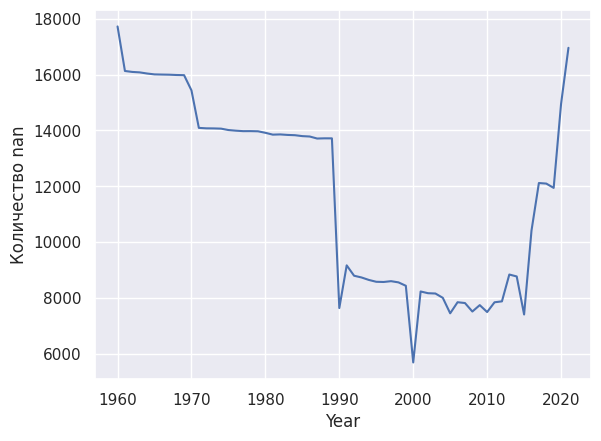

In [20]:
nans_cnt = df_main.groupby('Year').apply(lambda x: x['Value'].isna().sum())
sns.lineplot(nans_cnt)
plt.ylabel('Количество nan')

Так как данных меньше всего с 1990 по 2012, то ограничимся ими

In [21]:
mask = (df_main['Year'] >= 1990) & (df_main['Year'] <= 2012)
df_main = df_main[mask]

### Выбор метрик

In [22]:
df_main

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
606480,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1990,50.319000
606481,Aruba,ABW,Urban population,SP.URB.TOTL,1990,33066.000000
606482,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,1990,1.683480
606483,Aruba,ABW,"Population, total",SP.POP.TOTL,1990,65712.000000
606484,Aruba,ABW,Population growth (annual %),SP.POP.GROW,1990,1.712907
...,...,...,...,...,...,...
1071443,Zimbabwe,ZWE,Rural land area where elevation is below 5 met...,AG.LND.EL5M.RU.ZS,2012,NaN
1071444,Zimbabwe,ZWE,Rural land area where elevation is below 5 met...,AG.LND.EL5M.RU.K2,2012,NaN
1071445,Zimbabwe,ZWE,Arable land (% of land area),AG.LND.ARBL.ZS,2012,10.339925
1071446,Zimbabwe,ZWE,Agricultural land (% of land area),AG.LND.AGRI.ZS,2012,41.876696


In [23]:
#nans_cnt = df_main.groupby('Indicator Name').apply(lambda x: x['Value'].isna().sum())
nans_cnt.sort_values(inplace=True)
nans_cnt.reset_index(name='nans cnt')

,Year,nans cnt
0,2000,5688
1,2015,7406
2,2005,7448
3,2010,7493
4,2008,7512
...,...,...
57,1963,16077
58,1962,16093
59,1961,16127
60,2021,16957


Какие метрики оставим?


**Energy**:

"Renewable electricity output (% of total electricity output)",
"Energy use (kg of oil equivalent per capita)",
"Electric power consumption (kWh per capita)",
"Electricity production from renewable sources, excluding hydroelectric (kWh)",
"Electricity production from coal sources (% of total)",
"Electricity production from hydroelectric sources (% of total)",
"Electricity production from natural gas sources (% of total)",
"Electricity production from nuclear sources (% of total)",
"Electricity production from oil sources (% of total)",
"Electricity production from renewable sources, excluding hydroelectric (% of total)"


**Population**:
"Population, total",
"Population growth (annual %)",
"Urban population (% of total population)",
"Urban population growth (annual %)"

**Economics**:
"Foreign direct investment, net inflows (% of GDP)",
"Mortality rate, under-5 (per 1,000 live births)",

**Agriculture**:
"Agricultural land (% of land area)",
"Forest area (% of land area)",
"Arable land (% of land area)",
"Agriculture, forestry, and fishing, value added (% of GDP)",

**Atmosphere emissions**:
"Methane emissions (kt of CO2 equivalent)",
"Nitrous oxide emissions (thousand metric tons of CO2 equivalent)",
"Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",
"CO2 emissions (metric tons per capita)",
"CO2 emissions from liquid fuel consumption (% of total)",
"CO2 emissions from solid fuel consumption (% of total)",
"CO2 emissions from gaseous fuel consumption (% of total)",

Оставим только выбранные метрики

In [24]:
selected_metrics = ["Renewable electricity output (% of total electricity output)",
                    "Energy use (kg of oil equivalent per capita)",
                    "Electric power consumption (kWh per capita)",
                    "Electricity production from renewable sources, excluding hydroelectric (kWh)",
                    "Electricity production from coal sources (% of total)",
                    "Electricity production from hydroelectric sources (% of total)",
                    "Electricity production from natural gas sources (% of total)",
                    "Electricity production from nuclear sources (% of total)",
                    "Electricity production from oil sources (% of total)",
                    "Electricity production from renewable sources, excluding hydroelectric (% of total)",
                    "Population, total",
                    "Population growth (annual %)",
                    "Urban population (% of total population)",
                    "Urban population growth (annual %)",
                    "Foreign direct investment, net inflows (% of GDP)",
                    "Mortality rate, under-5 (per 1,000 live births)",
                    "Agricultural land (% of land area)",
                    "Forest area (% of land area)",
                    "Arable land (% of land area)",
                    "Agriculture, forestry, and fishing, value added (% of GDP)",
                    "Methane emissions (kt of CO2 equivalent)",
                    "Nitrous oxide emissions (thousand metric tons of CO2 equivalent)",
                    "Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",
                    "CO2 emissions (metric tons per capita)",
                    "CO2 emissions from liquid fuel consumption (% of total)",
                    "CO2 emissions from solid fuel consumption (% of total)",
                    "CO2 emissions from gaseous fuel consumption (% of total)"]

In [25]:
df_main = df_main[df_main['Indicator Name'].isin(selected_metrics)]
meta_indicators_df = meta_indicators_df[meta_indicators_df['indicator_name'].isin(selected_metrics)]

## Вывод по подготовке

**Откуда взяты данные?**
[The World Bank](https://data.worldbank.org/topic/19)

**Какие данные имеем?**
Имеем данные по странам и агрегациям стран за годы с 1990 по 2012. Для каждой пары страна-год имеем набор метрик.
Метрики можно отнести к типам:
* Загрязненность атмосферы
* Экономические метрики
* Развитость сельского хозяйства и "зеленость" страны
* Потребление и способы добычи энергии
* Городское и сельское население страны

Все метрики перечислены в предыдущем пункте. Тип данных - float. В названии описана величина и единицы измерения


**Для чего можно использовать данные?**
* Наблюдение динамики по миру
    * Как изменилась экологическая обстановка за 20 лет?
    * Темпы роста урбанизации за 20 лет
* Наблюдение динамика в рамках одной страны
    * Как менялось экономическое положение страны, а вместе с этим вред окружающей среде?
* Выявление факторов, косвенно влияющих на экологию
    *  Какая взаимосвязь между развитием сельского хозяйства и вреда экологии?
    * Можем ли мы говорить, что более бедные страны более экологичны
    * Является ли высокий уровень урбанизации причиной высокого выброса CO2 в атмосферу?
    * Являются ли страны с традиционными методами земледелия более экологичными?


## Переименовывание столбцов

In [26]:
cols = ['country_name', 'country_code', 'indicator_name', 'indicator_code', 'year', 'value']
df_main.columns = cols
df_main

,country_name,country_code,indicator_name,indicator_code,year,value
606480,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1990,50.319000
606482,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,1990,1.683480
606483,Aruba,ABW,"Population, total",SP.POP.TOTL,1990,65712.000000
606484,Aruba,ABW,Population growth (annual %),SP.POP.GROW,1990,1.712907
606488,Aruba,ABW,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,1990,NaN
...,...,...,...,...,...,...
1071432,Zimbabwe,ZWE,Electricity production from coal sources (% of...,EG.ELC.COAL.ZS,2012,39.052483
1071434,Zimbabwe,ZWE,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,2012,2.044131
1071438,Zimbabwe,ZWE,Forest area (% of land area),AG.LND.FRST.ZS,2012,46.046633
1071445,Zimbabwe,ZWE,Arable land (% of land area),AG.LND.ARBL.ZS,2012,10.339925


In [32]:
dict_df = df_main[['indicator_name', 'indicator_code']].drop_duplicates()

des_dict = dict(zip(dict_df['indicator_code'], dict_df['indicator_name']))

In [33]:
des_dict

{'SP.URB.TOTL.IN.ZS': 'Urban population (% of total population)',
 'SP.URB.GROW': 'Urban population growth (annual %)',
 'SP.POP.TOTL': 'Population, total',
 'SP.POP.GROW': 'Population growth (annual %)',
 'SH.DYN.MORT': 'Mortality rate, under-5 (per 1,000 live births)',
 'NV.AGR.TOTL.ZS': 'Agriculture, forestry, and fishing, value added (% of GDP)',
 'EN.ATM.NOXE.KT.CE': 'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
 'EN.ATM.METH.KT.CE': 'Methane emissions (kt of CO2 equivalent)',
 'EN.ATM.GHGO.KT.CE': 'Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)',
 'EN.ATM.CO2E.SF.ZS': 'CO2 emissions from solid fuel consumption (% of total)',
 'EN.ATM.CO2E.PC': 'CO2 emissions (metric tons per capita)',
 'EN.ATM.CO2E.LF.ZS': 'CO2 emissions from liquid fuel consumption (% of total)',
 'EN.ATM.CO2E.GF.ZS': 'CO2 emissions from gaseous fuel consumption (% of total)',
 'EG.USE.PCAP.KG.OE': 'Energy use (kg of oil equivalent per capita)',
 '

In [34]:
df_pivot.columns

Index(['country_name', 'country_code', 'year', 'AG.LND.AGRI.ZS',
       'AG.LND.ARBL.ZS', 'AG.LND.FRST.ZS', 'BX.KLT.DINV.WD.GD.ZS',
       'EG.ELC.COAL.ZS', 'EG.ELC.HYRO.ZS', 'EG.ELC.NGAS.ZS', 'EG.ELC.NUCL.ZS',
       'EG.ELC.PETR.ZS', 'EG.ELC.RNEW.ZS', 'EG.ELC.RNWX.KH', 'EG.ELC.RNWX.ZS',
       'EG.USE.ELEC.KH.PC', 'EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.GF.ZS',
       'EN.ATM.CO2E.LF.ZS', 'EN.ATM.CO2E.PC', 'EN.ATM.CO2E.SF.ZS',
       'EN.ATM.GHGO.KT.CE', 'EN.ATM.METH.KT.CE', 'EN.ATM.NOXE.KT.CE',
       'NV.AGR.TOTL.ZS', 'SH.DYN.MORT', 'SP.POP.GROW', 'SP.POP.TOTL',
       'SP.URB.GROW', 'SP.URB.TOTL.IN.ZS'],
      dtype='object')

## Создание сводной таблицы

In [53]:
df_pivot.columns

Index(['country_name', 'country_code', 'year', 'AG.LND.AGRI.ZS',
       'AG.LND.ARBL.ZS', 'AG.LND.FRST.ZS', 'BX.KLT.DINV.WD.GD.ZS',
       'EG.ELC.COAL.ZS', 'EG.ELC.HYRO.ZS', 'EG.ELC.NGAS.ZS', 'EG.ELC.NUCL.ZS',
       'EG.ELC.PETR.ZS', 'EG.ELC.RNEW.ZS', 'EG.ELC.RNWX.KH', 'EG.ELC.RNWX.ZS',
       'EG.USE.ELEC.KH.PC', 'EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.GF.ZS',
       'EN.ATM.CO2E.LF.ZS', 'EN.ATM.CO2E.PC', 'EN.ATM.CO2E.SF.ZS',
       'EN.ATM.GHGO.KT.CE', 'EN.ATM.METH.KT.CE', 'EN.ATM.NOXE.KT.CE',
       'NV.AGR.TOTL.ZS', 'SH.DYN.MORT', 'SP.POP.GROW', 'SP.POP.TOTL',
       'SP.URB.GROW', 'SP.URB.TOTL.IN.ZS'],
      dtype='object')

In [27]:
df_pivot = pd.pivot_table(df_main,
                       index=['country_name','country_code', 'year'],
                       columns='indicator_code',
                       values=['value'])
df_pivot = df_pivot.reset_index()
cols = list(df_pivot.columns.get_level_values(1))
cols[:3] = ['country_name', 'country_code', 'year']
df_pivot.columns = cols
df_pivot

,country_name,country_code,year,AG.LND.AGRI.ZS,AG.LND.ARBL.ZS,AG.LND.FRST.ZS,BX.KLT.DINV.WD.GD.ZS,EG.ELC.COAL.ZS,EG.ELC.HYRO.ZS,EG.ELC.NGAS.ZS,...,EN.ATM.CO2E.SF.ZS,EN.ATM.GHGO.KT.CE,EN.ATM.METH.KT.CE,EN.ATM.NOXE.KT.CE,NV.AGR.TOTL.ZS,SH.DYN.MORT,SP.POP.GROW,SP.POP.TOTL,SP.URB.GROW,SP.URB.TOTL.IN.ZS
0,Afghanistan,AFG,1990,58.322984,12.127624,1.852782,NaN,NaN,NaN,NaN,...,9.415270,935.064407,6739.999771,2840.0,NaN,178.5,0.202434,10694796.0,0.623574,21.177
1,Afghanistan,AFG,1991,58.307652,12.127624,1.852782,NaN,NaN,NaN,NaN,...,9.100584,765.938263,7019.999981,2930.0,NaN,172.2,0.469880,10745167.0,0.889255,21.266
2,Afghanistan,AFG,1992,58.307652,12.127624,1.852782,NaN,NaN,NaN,NaN,...,1.538601,-263.076820,7130.000114,2890.0,NaN,166.3,11.522524,12057433.0,11.940176,21.355
3,Afghanistan,AFG,1993,58.160465,11.995768,1.852782,NaN,NaN,NaN,NaN,...,1.348162,-325.709000,7210.000038,2930.0,NaN,160.8,14.964455,14003760.0,15.380336,21.444
4,Afghanistan,AFG,1994,57.974947,11.810251,1.852782,NaN,NaN,NaN,NaN,...,1.128308,-650.316902,7469.999790,2760.0,NaN,155.5,9.864262,15455555.0,10.283085,21.534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6090,Zimbabwe,ZWE,2008,42.522942,10.986170,46.522993,1.168557,23.711475,74.859016,0.0,...,78.454500,-30.492310,11369.999886,5360.0,19.021074,94.7,0.798207,12550347.0,0.254389,33.560
6091,Zimbabwe,ZWE,2009,42.135195,10.598423,46.403903,1.086305,24.070772,74.859416,0.0,...,46.227858,-532.520508,11829.999924,5770.0,10.742550,91.3,1.026265,12679810.0,0.482488,33.378
6092,Zimbabwe,ZWE,2010,41.876696,10.339925,46.284813,1.018022,31.713791,66.924409,0.0,...,57.528165,608.506409,12270.000458,6120.0,9.609863,86.1,1.253650,12839771.0,0.706879,33.196
6093,Zimbabwe,ZWE,2011,42.393693,10.856921,46.165723,2.441511,41.655816,56.434462,0.0,...,50.999704,1469.966370,12640.000343,6260.0,8.665865,80.6,1.438339,13025785.0,0.891612,33.015


In [35]:
df_pivot['country_name'].unique()

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Repub

# Проработка гипотез

1. Чем больше темпы роста урбанизации страны, тем больше загрязнение окружающей среды
2. Страны, использующие ядерную энергетику, создают меньше выбросов в атмосферу
3. Низкое соотношения вспахиваемых земель к плодородным землям свидетельствует о низком доходе населения и высокой детской смертности
4. Чем больше вклад земледелия, лесоводства в ВВП, тем выше загрязнение окружающей среды
5. Что больше выработка электричества из возобновляемых источников энергия, тем меньше вклад земледелия и лесоводства в ВВП
6. Восточная Азия является мировым лидером по выбросу CO2
7. Количество иностранные инвестиции коррелирует с количеством выбросов в атмосферу

Запомним названия стран отдельно

In [47]:
for val in ['East Asia & Pacific (IDA & IBRD countries)',  'Europe & Central Asia (IDA & IBRD countries)',
                         'Latin America & the Caribbean (IDA & IBRD countries)',  'Middle East & North Africa (IDA & IBRD countries)',
                         'Sub-Saharan Africa (IDA & IBRD countries)']:
                         
    region_aggregate.add(val)

In [50]:
countries = set(df_pivot['country_name']).difference(set(all_without_region).union(set(region_aggregate)))

In [51]:
# all_without_region

In [52]:
# region_aggregate

<ipython-input-55-cb56b74cff6e>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df_pivot[df_pivot['country_name'].isin(countries)].groupby('country_name').mean()


Correlation coefficient: -0.20


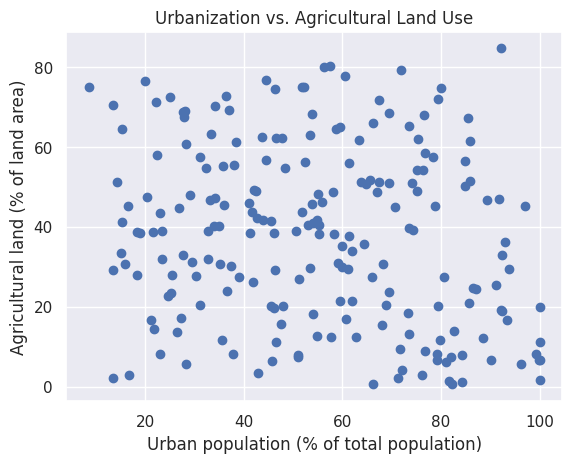

In [55]:
# 1. Countries with higher urban populations have lower agricultural land as a percentage of their total land area

# Не подтвердилась!


# Group the data by country and calculate the mean values for each column
grouped = df_pivot[df_pivot['country_name'].isin(countries)].groupby('country_name').mean()

# Create a scatter plot of urban population percentage vs. agricultural land percentage
plt.scatter(grouped['SP.URB.TOTL.IN.ZS'], grouped['AG.LND.AGRI.ZS'])
plt.xlabel('Urban population (% of total population)')
plt.ylabel('Agricultural land (% of land area)')
plt.title('Urbanization vs. Agricultural Land Use')

# Calculate and print the correlation coefficient
correlation = grouped['SP.URB.TOTL.IN.ZS'].corr(grouped['AG.LND.AGRI.ZS'])
print(f'Correlation coefficient: {correlation:.2f}')

# Show the plot
plt.show()
None

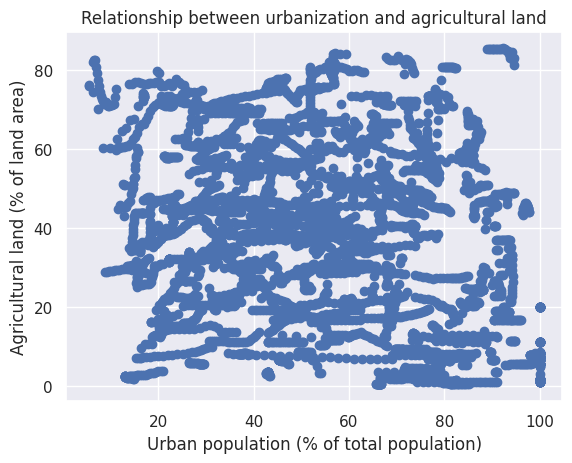

In [56]:
# 2. Countries with higher levels of urbanization have lower levels of agricultural land as a percentage of total land area.

plt.scatter(df_pivot[df_pivot['country_name'].isin(countries)]['SP.URB.TOTL.IN.ZS'], df_pivot[df_pivot['country_name'].isin(countries)]['AG.LND.AGRI.ZS'])
plt.xlabel('Urban population (% of total population)')
plt.ylabel('Agricultural land (% of land area)')
plt.title('Relationship between urbanization and agricultural land')
plt.show()


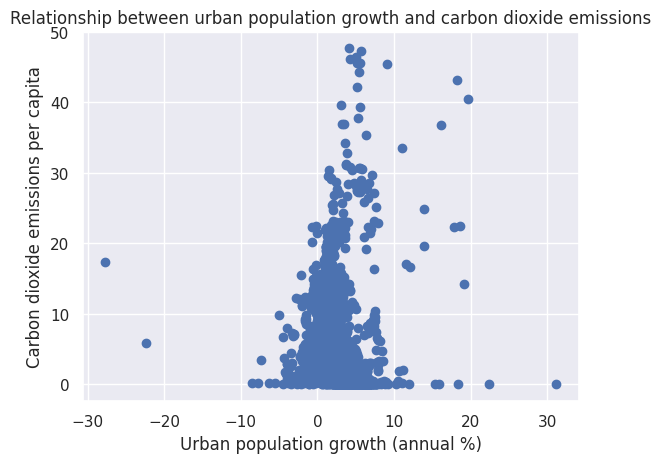

In [59]:
# 3. Countries with higher levels of urban population growth tend to have higher levels of carbon dioxide emissions per capita.

plt.scatter(df_pivot[df_pivot['country_name'].isin(countries)]['SP.URB.GROW'], df_pivot[df_pivot['country_name'].isin(countries)]['EN.ATM.CO2E.PC'])
plt.xlabel('Urban population growth (annual %)')
plt.ylabel('Carbon dioxide emissions per capita')
plt.title('Relationship between urban population growth and carbon dioxide emissions')
plt.show()

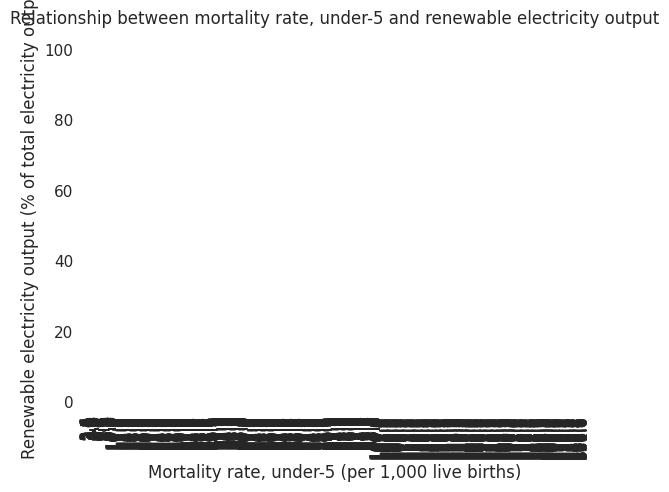

In [60]:
# 4. Countries with higher levels of mortality rate, under-5 tend to have lower levels of electricity production from renewable sources.

# булщит

df_pivot[df_pivot['country_name'].isin(countries)].groupby('SH.DYN.MORT')['EG.ELC.RNEW.ZS'].mean().plot(kind='bar')
plt.xlabel('Mortality rate, under-5 (per 1, 000 live births)')
plt.ylabel('Renewable electricity output (% of total electricity output)')
plt.title('Relationship between mortality rate, under-5 and renewable electricity output')
plt.show()

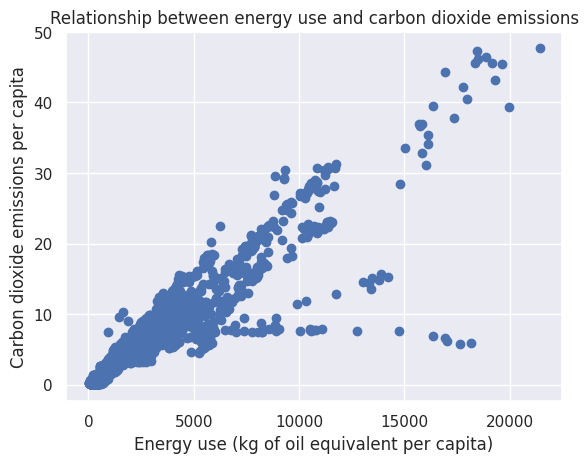

In [61]:
# 5. Countries with higher levels of energy use per capita tend to have higher levels of carbon dioxide emissions per capita.

plt.scatter(df_pivot[df_pivot['country_name'].isin(countries)]['EG.USE.PCAP.KG.OE'], df_pivot[df_pivot['country_name'].isin(countries)]['EN.ATM.CO2E.PC'])
plt.xlabel('Energy use (kg of oil equivalent per capita)')
plt.ylabel('Carbon dioxide emissions per capita')
plt.title('Relationship between energy use and carbon dioxide emissions')
plt.show()

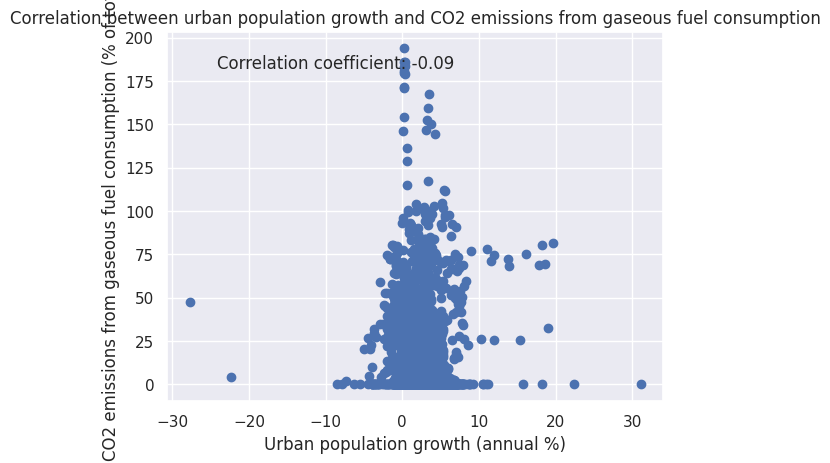

In [64]:
# 6. Is there a correlation between a country's urban population growth and its CO2 emissions from gaseous fuel consumption?

data = df_pivot[df_pivot['country_name'].isin(countries)][['SP.URB.GROW', 'EN.ATM.CO2E.GF.ZS']]
data = data.dropna()

corr = data['SP.URB.GROW'].corr(data['EN.ATM.CO2E.GF.ZS'])

# Plot the data
plt.scatter(data['SP.URB.GROW'], data['EN.ATM.CO2E.GF.ZS'])
plt.xlabel('Urban population growth (annual %)')
plt.ylabel('CO2 emissions from gaseous fuel consumption (% of total)')
plt.title('Correlation between urban population growth and CO2 emissions from gaseous fuel consumption')
plt.text(0.1, 0.9, f'Correlation coefficient: {corr:.2f}', transform=plt.gca().transAxes)
plt.show()

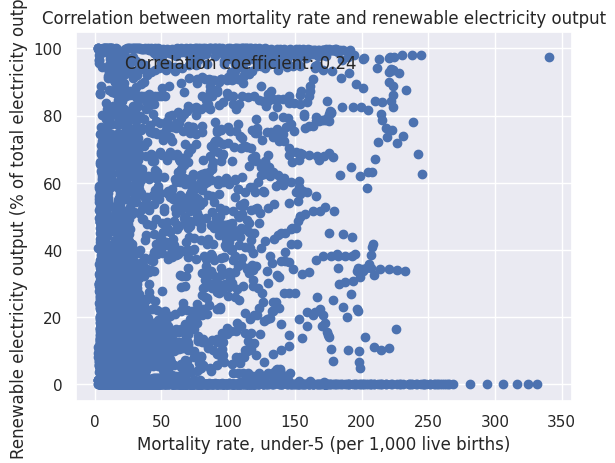

In [65]:
# 7. Do countries with higher mortality rates for children under 5 years of age tend to have lower percentages of renewable electricity output?

# Filter the data for the desired columns
data = df_pivot[df_pivot['country_name'].isin(countries)][['SH.DYN.MORT', 'EG.ELC.RNEW.ZS']]

# Drop any rows with missing values
data = data.dropna()

# Calculate the correlation coefficient
corr = data['SH.DYN.MORT'].corr(data['EG.ELC.RNEW.ZS'])

# Plot the data
plt.scatter(data['SH.DYN.MORT'], data['EG.ELC.RNEW.ZS'])
plt.xlabel('Mortality rate, under-5 (per 1,000 live births)')
plt.ylabel('Renewable electricity output (% of total electricity output)')
plt.title('Correlation between mortality rate and renewable electricity output')
plt.text(0.1, 0.9, f'Correlation coefficient: {corr:.2f}', transform=plt.gca().transAxes)
plt.show()